In [1]:
%cd ..

/home/ead/iking5/code/CASTLE/challenge2


In [2]:
import torch 
import matplotlib.pyplot as plt 

In [3]:
def smooth_the_data(epochs, reward, smoothing_factor=1000, color='blue', label=None):
    reward = torch.tensor(reward)
    segments = reward.unfold(0, size=smoothing_factor, step=1)
    
    mid = segments.mean(dim=-1)
    std = segments.std(dim=-1)
    epochs = epochs[:-smoothing_factor+1]
    
    plt.plot(epochs, mid, color=color, label=label)
    plt.fill_between(x=epochs, y1=mid+std, y2=mid-std, color=color, alpha=0.2)

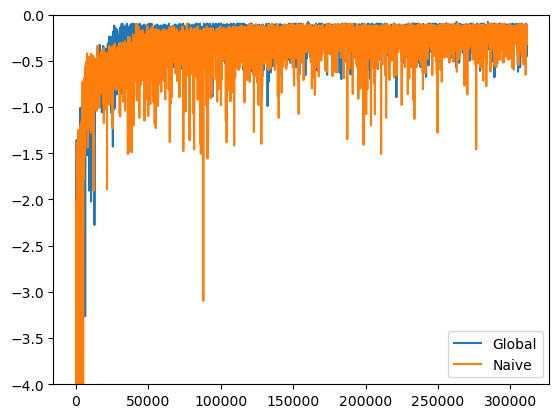

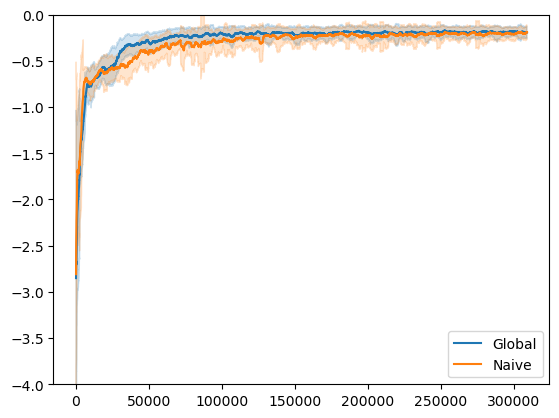

In [4]:
prog = torch.load('logs/globalnode.pt')
reward, epoch, loss = zip(*prog)

prog_old = torch.load('logs/inductive_500k.pt')
reward_old, epoch_old, loss_old = zip(*prog_old)

plt.plot(epoch,reward,label='Global', color='C0')
plt.plot(epoch_old[:len(epoch)], reward_old[:len(epoch)], label='Naive', color='C1')

plt.legend(loc='lower right')
plt.ylim(-4,0)
plt.show()

smooth_the_data(epoch,reward,label='Global', color='C0', smoothing_factor=100)
smooth_the_data(epoch_old[:len(epoch)], reward_old[:len(epoch)], label='Naive', color='C1', smoothing_factor=100)

plt.legend(loc='lower right')
plt.ylim(-4,0)
plt.show()

In [5]:
epoch[-1]

311349

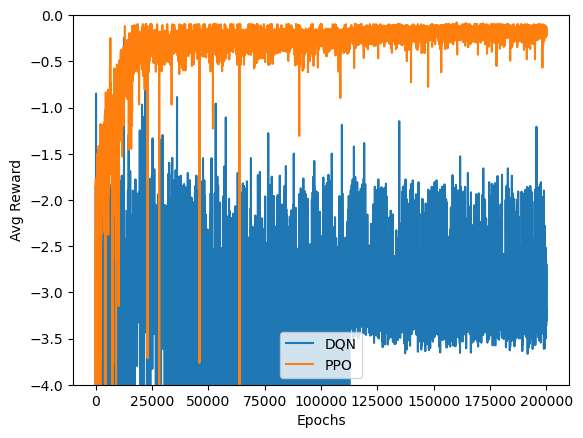

In [6]:
prog = torch.load('logs/dqn.pt')['prog']
reward, epoch, loss = zip(*prog)

prog_old = torch.load('logs/ppo.pt')
reward_old, epoch_old, loss_old = zip(*prog_old)

plt.plot(epoch, reward, label='DQN')
plt.plot(epoch_old[:len(epoch)], reward_old[:len(epoch)], label='PPO')

#plt.plot(epoch, loss, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Avg Reward')
plt.ylim(-4,0)
plt.legend()
plt.show()

In [7]:
reward.index(max(reward))

504

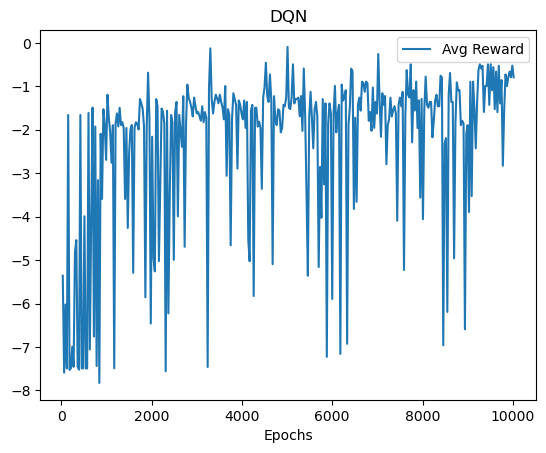

In [8]:
prog = torch.load('logs/dqn_historic.pt')['prog']
reward, epoch, loss = zip(*prog)
plt.plot(epoch, reward, label='Avg Reward')

#prog_ppo = torch.load('logs/ppo_Both.pt')
#reward_ppo, epoch_ppo, loss_ppo = zip(*prog_ppo)
#plt.plot(epoch_ppo[:len(epoch)], reward_ppo[:len(epoch)], label='PPO')

#plt.plot(epoch, loss, label='Loss')
plt.xlabel('Epochs')
plt.legend()
plt.title('DQN')
plt.show()

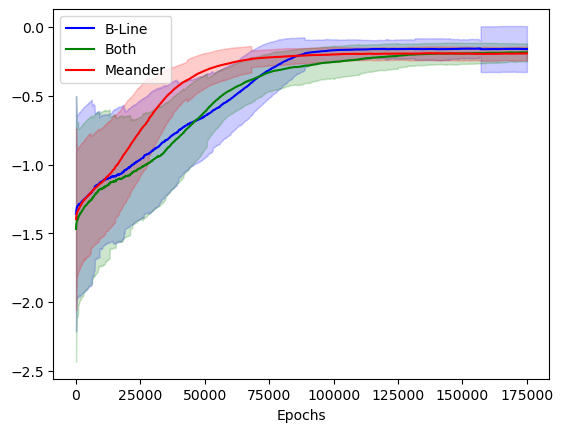

In [9]:
bline_prog = torch.load('logs/bline_ppo.pt')
meander_prog = torch.load('logs/meander_ppo.pt')
both_prog = torch.load('logs/ppo_Both.pt')

reward, epoch,_ = zip(*bline_prog)
smooth_the_data(epoch, reward, label='B-Line', color='blue')

reward, epoch,_ = zip(*both_prog)
smooth_the_data(epoch, reward, label='Both', color='green')

reward, epoch,_ = zip(*meander_prog)
smooth_the_data(epoch, reward, label='Meander', color='red')

#reward, epoch, loss = zip(*dqn_prog)
#plt.plot(epoch, reward, label='DQN')

plt.xlabel('Epochs')
#plt.xlim(left=0, right=1000)
plt.legend()
plt.show()

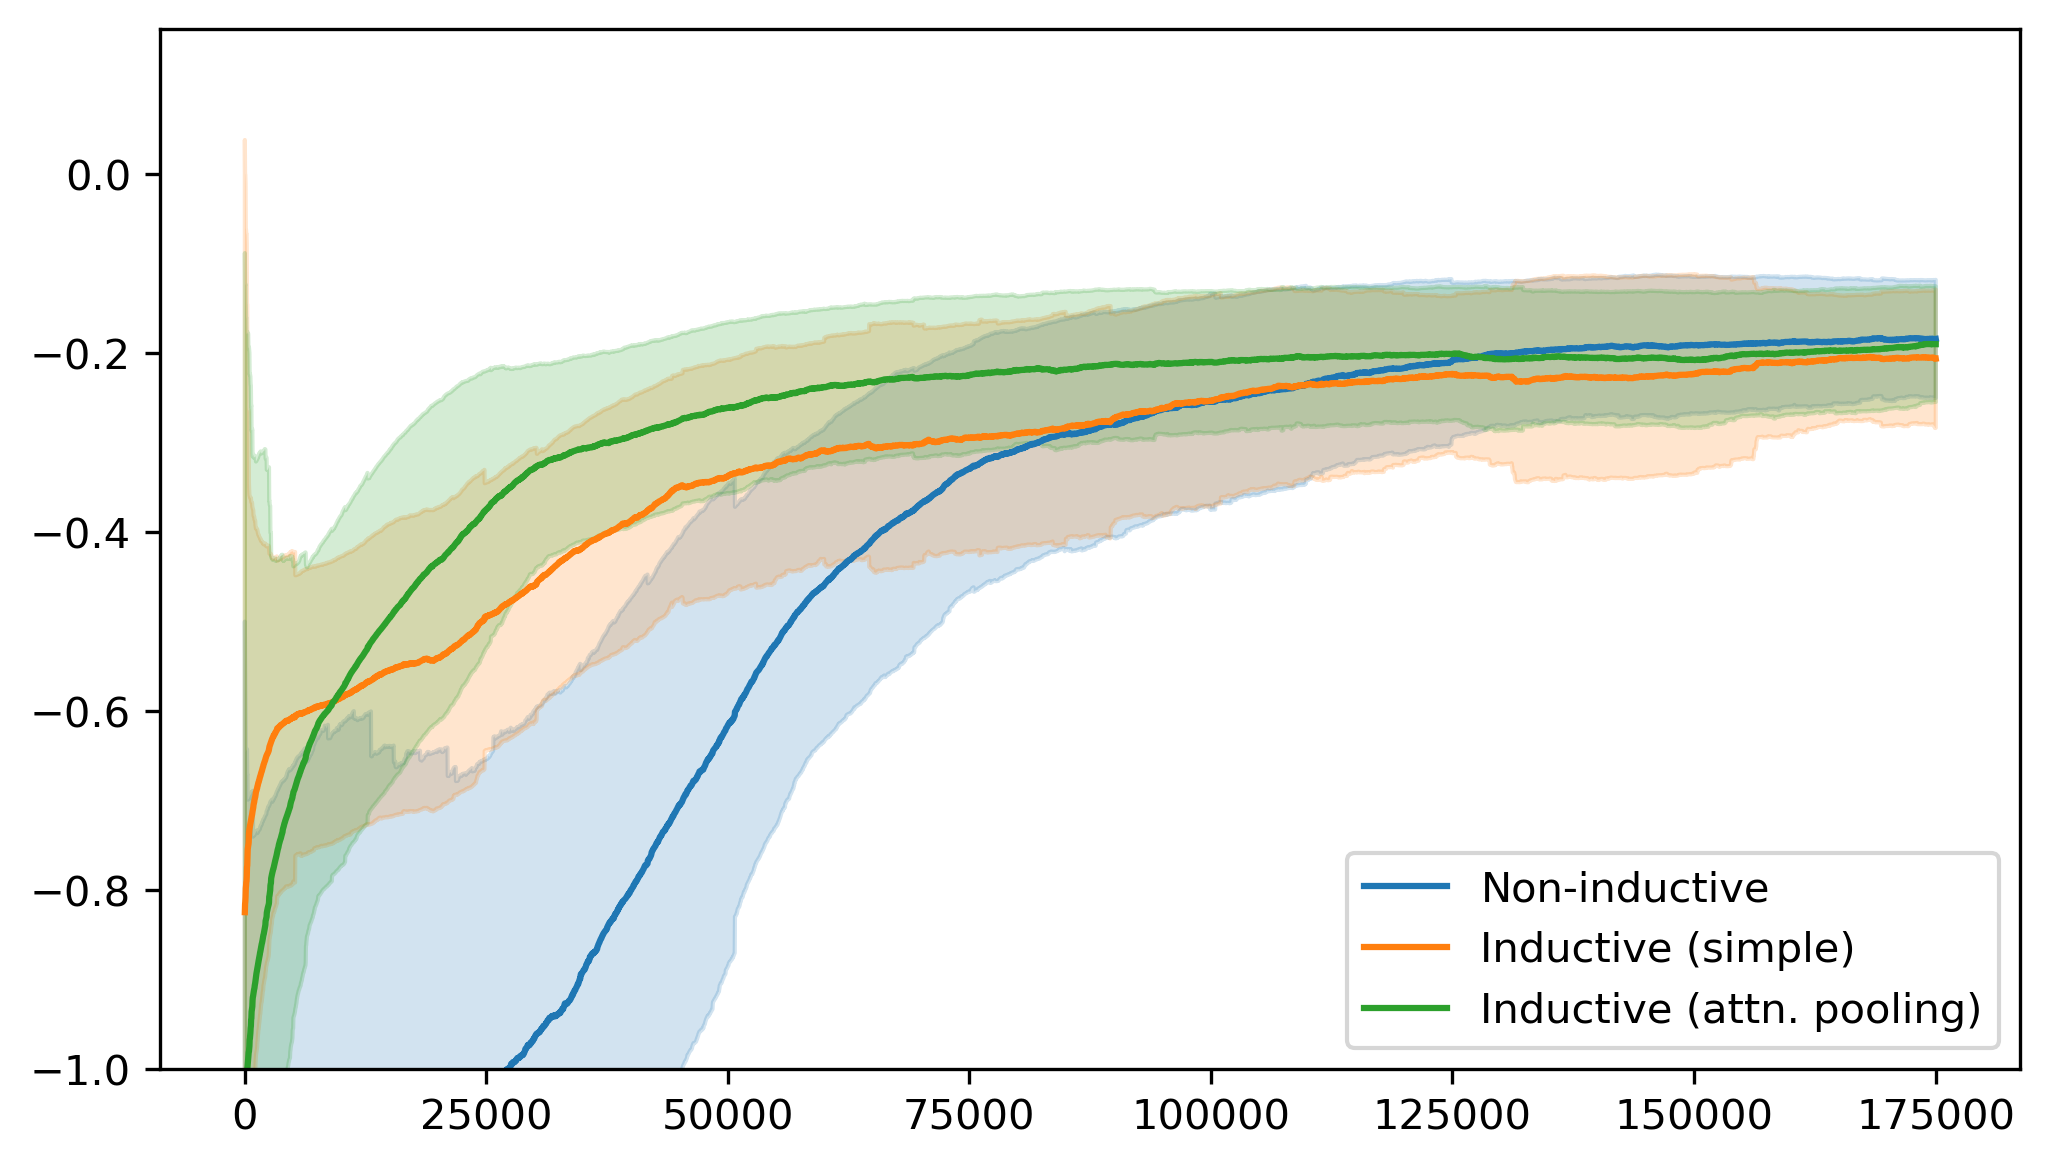

In [10]:
prog = torch.load('logs/inductive_ppo_200k.pt')
reward_i, epoch_i, _ = zip(*prog)

prog = torch.load('logs/globalnode_200k.pt')
reward_ia, epoch_ia, _ = zip(*prog)
reward_non, epoch_non,_ = zip(*both_prog)


epochs = min(len(epoch_i), len(epoch_ia))

plt.figure(figsize=(8,4.5), dpi=300)

smooth_the_data(epoch_non[:epochs], reward_non[:epochs], label='Non-inductive', color='C0')
smooth_the_data(epoch_i[:epochs], reward_i[:epochs], label='Inductive (simple)', color='C1')
smooth_the_data(epoch_ia[:epochs], reward_ia[:epochs], label='Inductive (attn. pooling)', color='C2')

plt.ylim(bottom=-1)
plt.legend(loc='lower right')
plt.show()

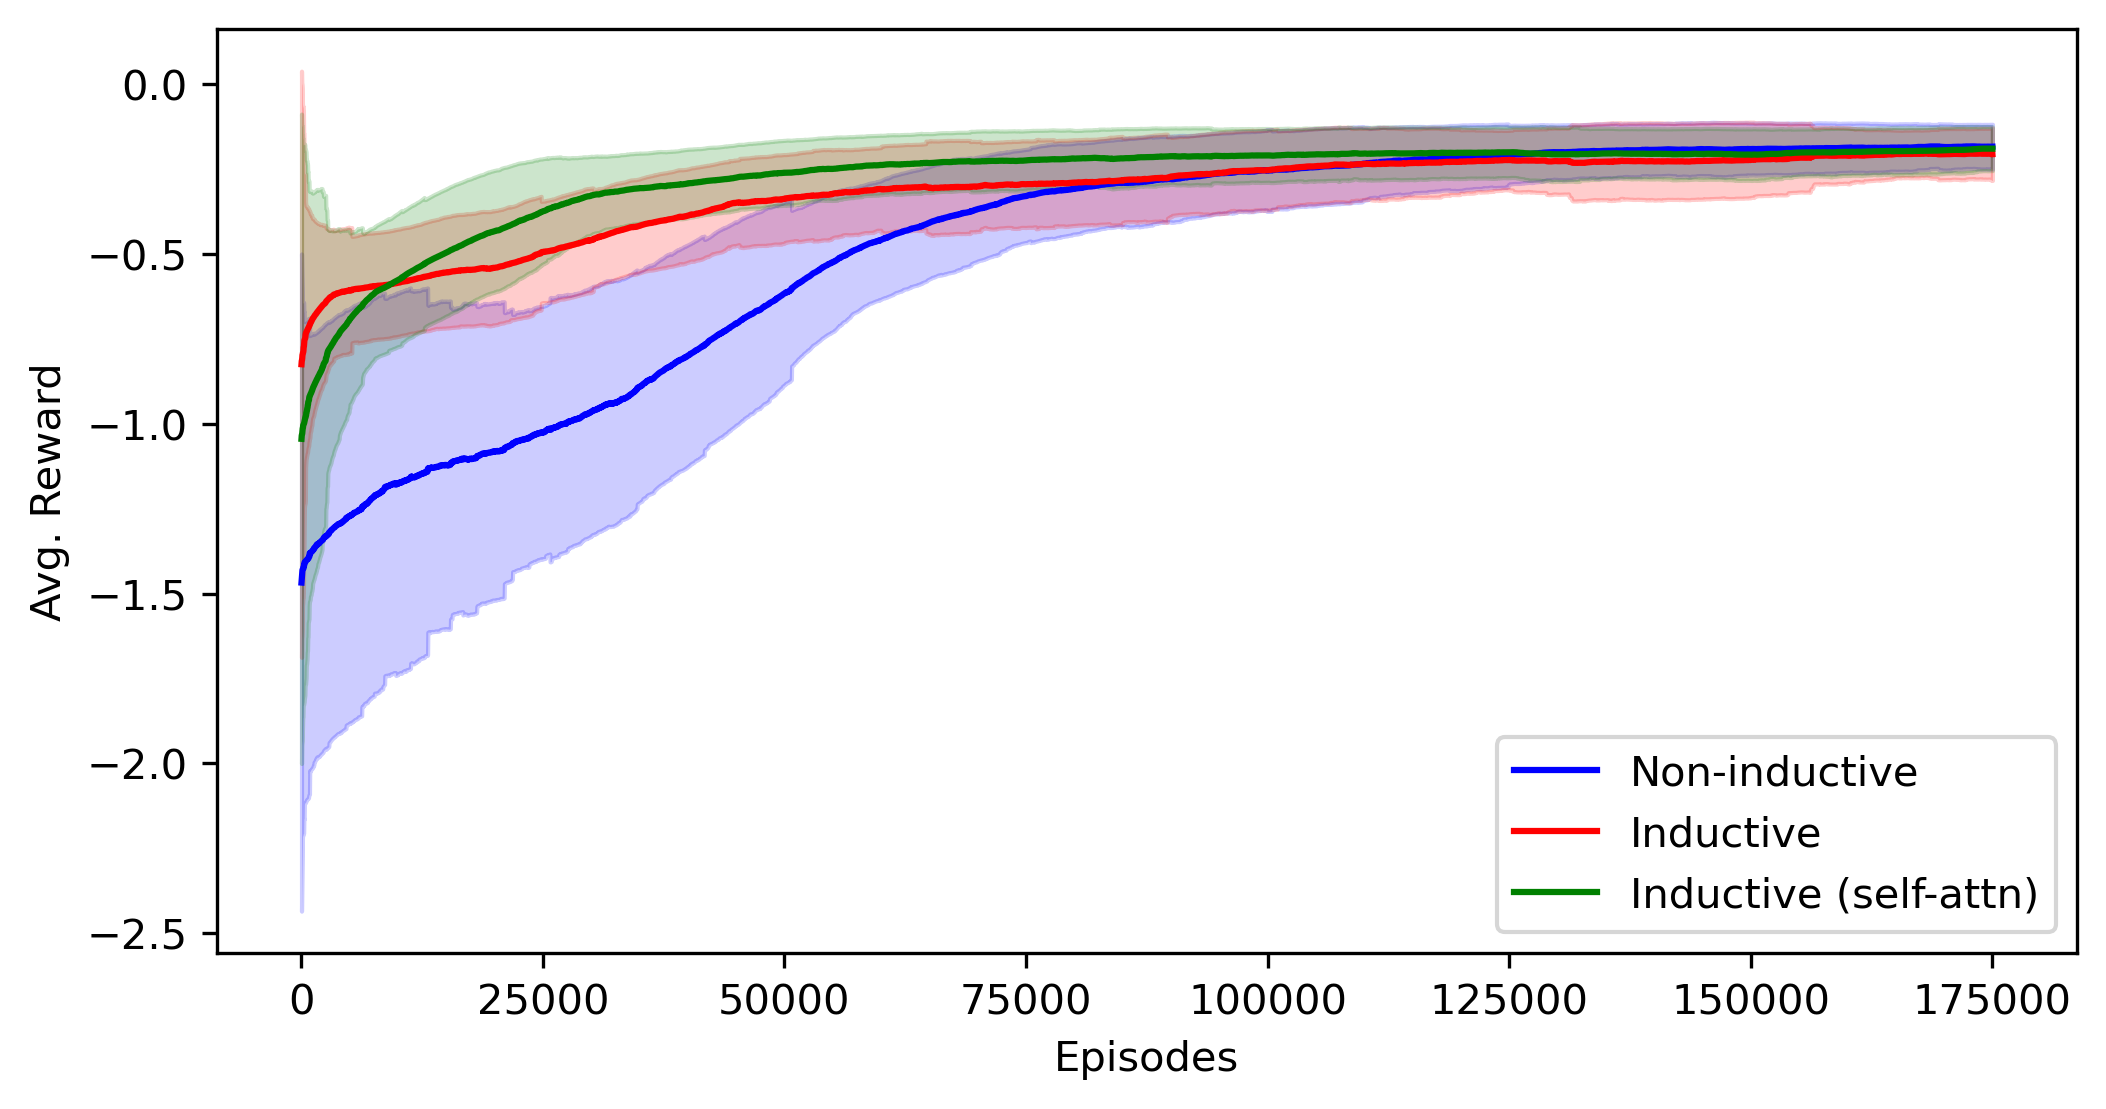

In [11]:
fig = plt.gcf()
fig.set_dpi(300)
fig.set_size_inches(8,4)
smooth_the_data(epoch_non[:epochs], reward_non[:epochs], label='Non-inductive')
smooth_the_data(epoch_i[:epochs], reward_i[:epochs], label='Inductive', color='red')
smooth_the_data(epoch_ia[:epochs], reward_ia[:epochs], label='Inductive (self-attn)', color='green')

plt.legend(loc='lower right')
plt.xlabel('Episodes')
plt.ylabel('Avg. Reward')
plt.show()

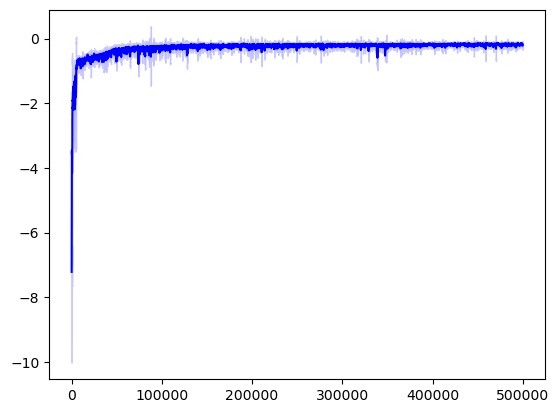

In [12]:
prog = torch.load('logs/inductive_500k.pt')
r, e, _ = zip(*prog)
smooth_the_data(e, r, smoothing_factor=10)
plt.show()